# Introduction

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap_path="intrusionDet.avi"
cap = cv2.VideoCapture(cap_path)

frames=[]

while cap.isOpened():
    ret, frame_image = cap.read()
    if not ret or frame_image is None:
        break
    frames.append(frame_image)
    
print(len(frames))
key_frame_indexes = [124, 164, 301]
key_frames = [frames[frame_index] for frame_index in key_frame_indexes]


503


# Background Estimation

## Initial Background

(240, 320, 3)


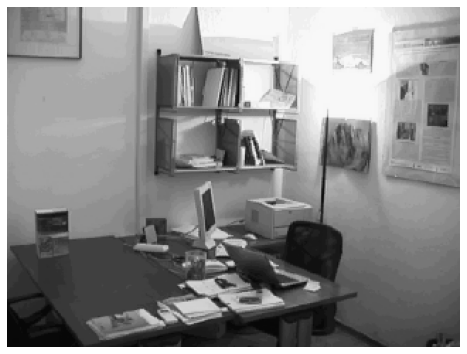

In [2]:

cap = cv2.VideoCapture(cap_path)
bg = []
idx = 0
frames_n=80
while(cap.isOpened() and idx < frames_n):
    ret, frame = cap.read()
    if ret and not frame is None:
        bg.append(frame)
        idx += 1
    else:
        break
cap.release()

image = np.median(np.stack(bg, axis=0), axis=0).astype(np.uint8)
subtraction = None
mask_raw = None
mask_refined = None
name = "{}_{}".format(frames_n, np.median)
print(image.shape)

#initial_background = Background(input_video_path, np.median, 80)
dim=2.5
plt.figure(figsize=(5 * dim, 2.5 * dim))
plt.axis('off')
plt.title='Median of 80 pixels'
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()
#initial_background.display('image', title='Median of 80 pixels')

## Background Update

For the selective approach, a threshold and a distance function have to be used to compute the subtraction between the frame and the background.

As a further improvement, some binary morphology operators are applied to obtain a more meaningful background mask:

- 3x3 Opening: Denoising of the subtraction
- 50x50 Closing: Filling of any potential holes
- 15x15 Dilation: Achievement of a mask big enough to contain the detected objects and their position after any movement

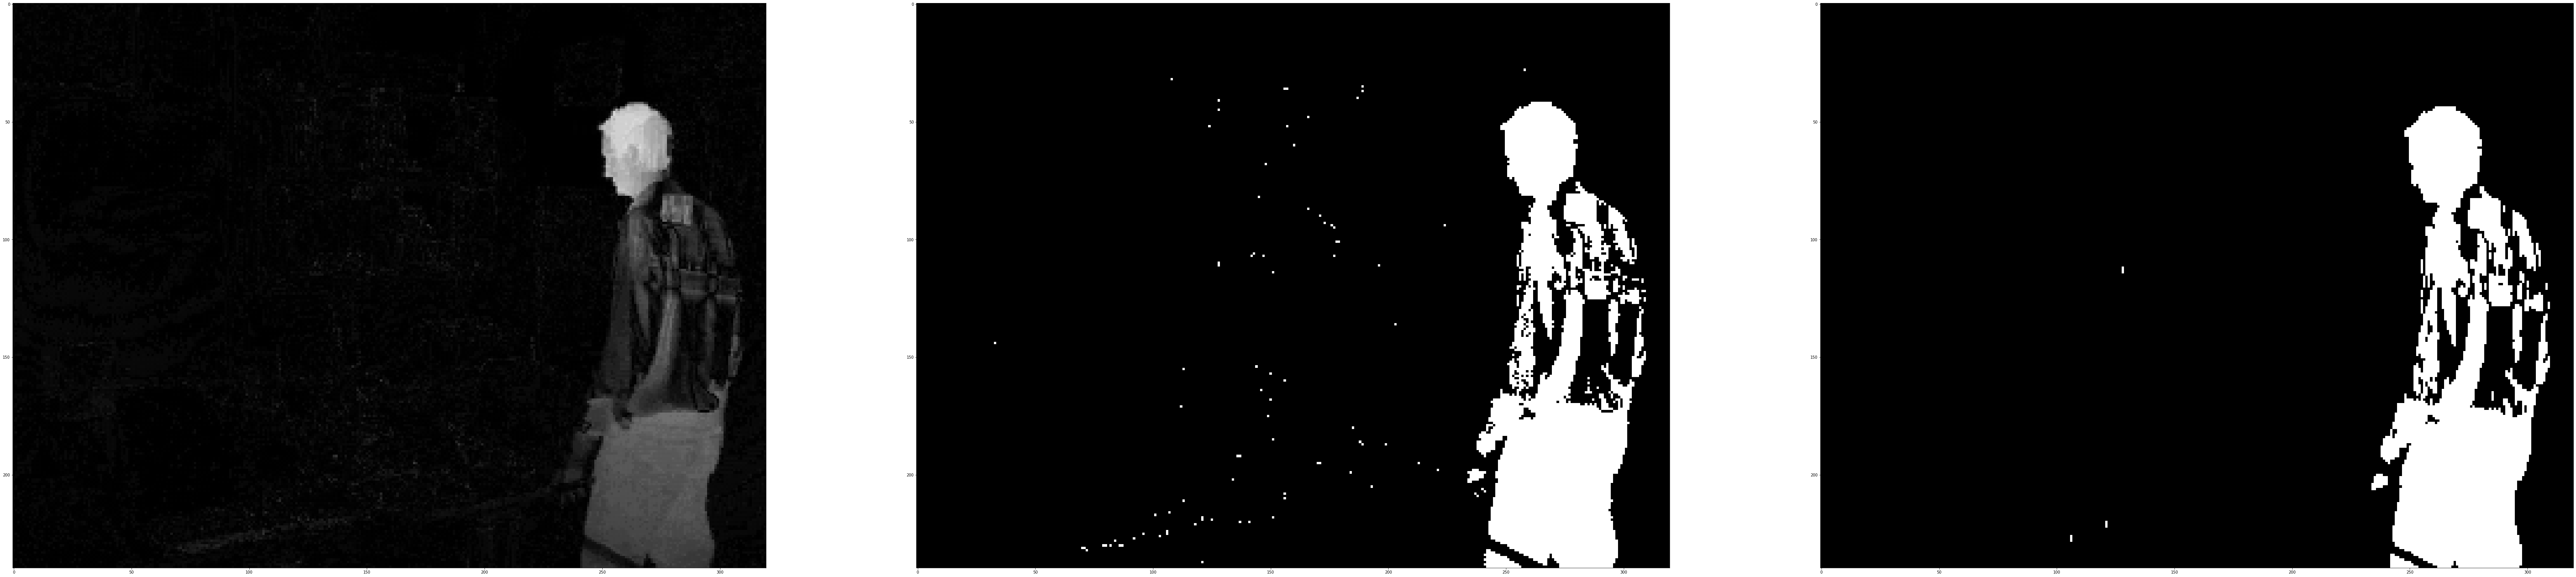

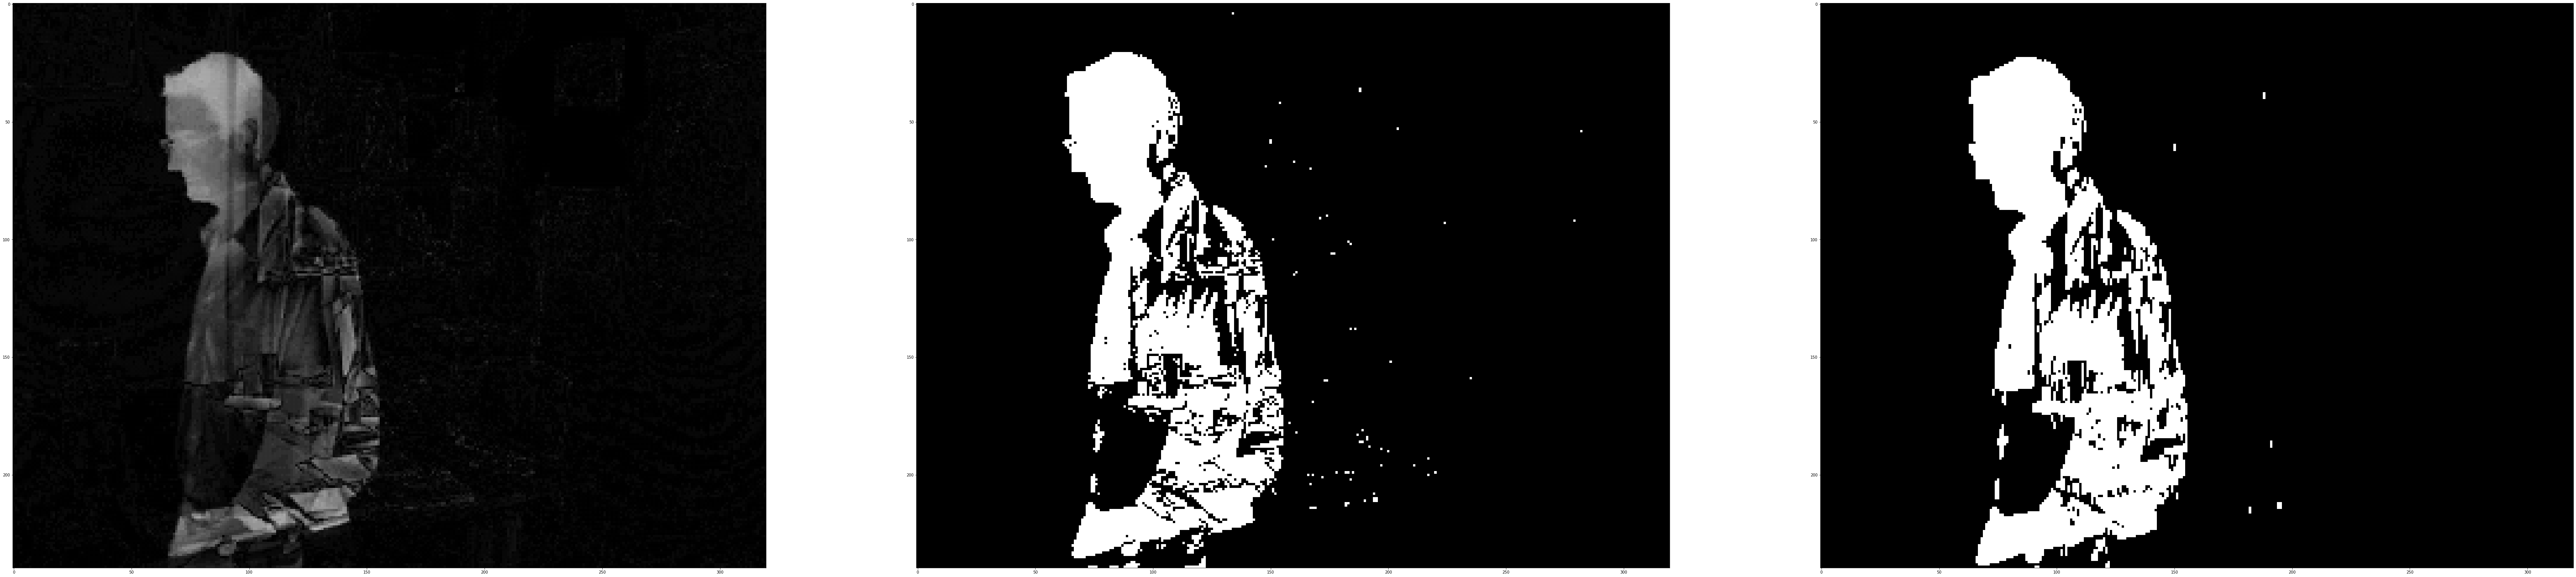

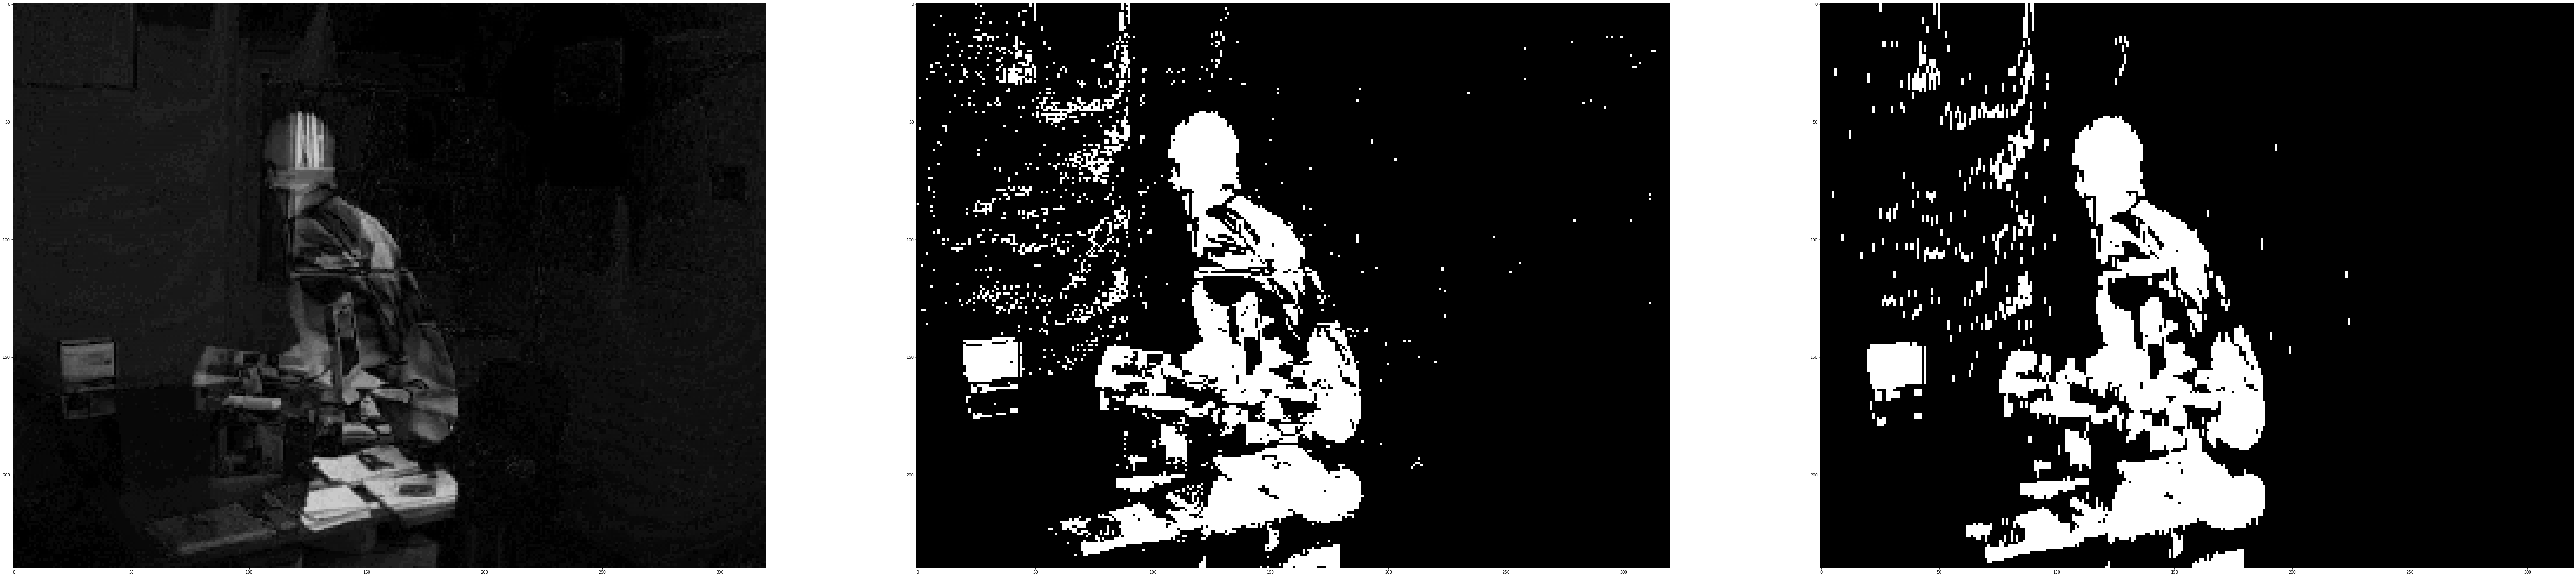

In [3]:
background_threshold = 30
background_alpha = 0.3

#selective_backgrounds = video.process_backgrounds(
#    BackgroundMethod.SELECTIVE, initial_background, background_alpha, background_threshold, background_distance, 
#    MorphOpsSet(
#        MorphOp(cv2.MORPH_OPEN, (3,3)), 
#        MorphOp(cv2.MORPH_CLOSE, (50,50), cv2.MORPH_ELLIPSE), 
#        MorphOp(cv2.MORPH_DILATE, (15,15), cv2.MORPH_ELLIPSE)
#    )
#)

idx=0
backgrounds = [image]
for fr in frames:
    #fr=fr[:,:,0]
    #bg_image = bg.update_selective(fr, threshold, distance, alpha, morph_ops)
    subtraction = np.sqrt((fr.astype(float) - image.astype(float)) ** 2).astype(np.uint8)
    mask = np.where(subtraction > background_threshold, 255, 0).astype(np.uint8)
    #mask_refined = morph_ops.apply(mask_raw)
    
    blind=(image * (1 - background_alpha) + frame * background_alpha).astype(np.uint8)
    mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, (3,3))
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, (50,50))
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, (15,15), cv2.MORPH_ELLIPSE)
        
    bg2 = np.where(mask == 0, blind, fr).astype(np.uint8)
    backgrounds.append(bg2)
    
    if idx in key_frame_indexes:
        f,ax = plt.subplots(1,3,figsize=(120, 160))
        ax[0].imshow(subtraction)
        ax[1].imshow(mask)
        ax[2].imshow(mask1)
        plt.show()
        
    idx+=1




